In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
%matplotlib inline

In [2]:
# Distributions and Hypothesis Testing

In [6]:
mean = 3.5
sd = 0.76

In [7]:
nd = ss.norm(mean,sd)

In [8]:
nd

In [10]:
X = 2.6

In [12]:
nd.cdf(X)

0.11816486815719918

In [13]:
2*nd.cdf(X)

0.23632973631439835

In [15]:
2*nd.cdf(.5)

7.9014917775632523e-05

In [16]:
def two_tails_plot(nd,X,mean,sd):

    

    x = np.linspace(mean-4*sd, mean+4*sd, 5000)

    y_cdf = ss.norm.pdf(x,3.5, 0.76)

    plt.plot(x, y_cdf, label='cdf')

    if X < mean:

        lo = mean-4*sd

        hi = X

        lo2 = (mean-X)+mean

        hi2 = mean+4*sd

    else:

        lo = mean-4*sd

        hi = (mean-X)+mean

        lo2 = X

        hi2 = mean+4*sd

    x = np.linspace(lo, hi, 5000)

    x2 = np.linspace(lo2, hi2, 5000)

    plt.fill_between(x, nd.pdf(x), y2=0, where= x >= lo , \

                     interpolate=False, \

                     color='blue', alpha = 0.2)

    plt.fill_between(x2, nd.pdf(x2), y2=0, where= x2 >= lo2 , \

                     interpolate=False, \

                     color='blue', alpha = 0.2)



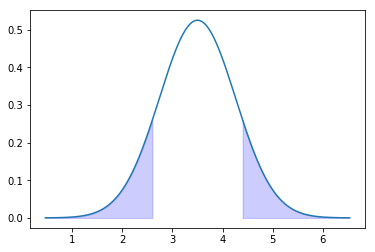

In [20]:
two_tails_plot(nd,X,mean,sd)




In [22]:
# One sided Test

In [26]:
mean = 1.03
sd = 0.1
nd = ss.norm(mean,sd)
X = 1.
n = 50

In [27]:
z = (X-mean)/(sd/np.sqrt(n))
print(z)

-2.12132034356


In [28]:
ss.norm.cdf(z)

0.01694742676234454

In [33]:
#Student t Test
#measuring thickness of a steel plate

In [31]:
X = np.array([1.316,1.308,1.321,1.303,1.311,1.310])

{'boxes': [<matplotlib.lines.Line2D at 0x2c768baccf8>],
 'caps': [<matplotlib.lines.Line2D at 0x2c768865978>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c768abecc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2c768abe080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2c768bac898>,
  <matplotlib.lines.Line2D at 0x2c7688654e0>]}

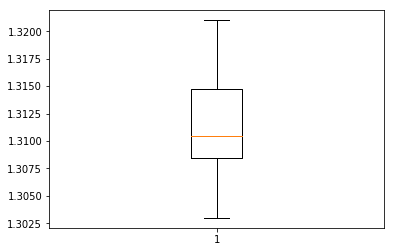

In [34]:
plt.boxplot(X)

In [35]:
mean = np.mean(X)
sd = np.std(X)
print(mean,sd)

1.3115 0.00573730482602


In [40]:
dF = len(X)-1
alpha = 0.99

In [42]:
ss.t.interval(alpha,dF,mean,ss.sem(X))

(1.3011543246307602, 1.3218456753692396)

In [45]:
X = np.array([1.316,1.308,1.321,1.303,1.311,1.310,3.5])

{'boxes': [<matplotlib.lines.Line2D at 0x2c7694bd438>],
 'caps': [<matplotlib.lines.Line2D at 0x2c7694bdf28>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c7694c5c88>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2c7694c5828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2c7694bd588>,
  <matplotlib.lines.Line2D at 0x2c7694bdac8>]}

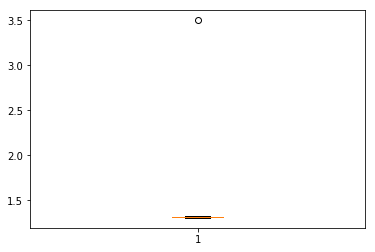

In [46]:
plt.boxplot(X)

In [60]:
ss.binom.interval(.05,85,.5955,loc=0)

(50.0, 51.0)

In [64]:
def binom_CI(n,X,alpha):
    n_hat = n+4
    p_hat = (X+2) / n_hat
    
    z = ss.norm.ppf(1-alpha/2)
    
    ci = z*np.sqrt(p_hat*(1-p_hat)/n_hat)
    
    return np.array([p_hat-ci, p_hat+ci])

In [65]:
binom_CI(85,51,.1)

array([ 0.50993367,  0.68107757])